In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Information about the dataset
X_train data: <br>
| Variable  | Description                                      |
|-----------|--------------------------------------------------|
| `t`       | timestep                                         |
| `x_1`     | coordinate x of the position of object 1         |
| `y_1`     | coordinate y of the position of object 1         |
| `v_x_1`   | coordinate x of the velocity of object 1         |
| `v_y_1`   | coordinate y of the velocity of object 1         |
| `x_2`     | coordinate x of the position of object 2         |
| `y_2`     | coordinate y of the position of object 2         |
| `v_x_2`   | coordinate x of the velocity of object 2         |
| `v_y_2`   | coordinate y of the velocity of object 2         |
| `x_3`     | coordinate x of the position of object 3         |
| `y_3`     | coordinate y of the position of object 3         |
| `v_x_3`   | coordinate x of the velocity of object 3         |
| `v_y_3`   | coordinate y of the velocity of object 3         |

X_test data:<br>

| Variable  | Description                                                    |
|-----------|----------------------------------------------------------------|
| `t`       | timestep                                                       |
| `x0_1`    | coordinate x of the position of object 1 at time t=0           |
| `y0_1`    | coordinate y of the position of object 1 at time t=0           |
| `x0_2`    | coordinate x of the position of object 2 at time t=0           |
| `y0_2`    | coordinate y of the position of object 2 at time t=0           |
| `x0_3`    | coordinate x of the position of object 3 at time t=0           |
| `y0_3`    | coordinate y of the position of object 3 at time t=0           |

For the test data, we only have the initial positions, and we assume that the initial velocity is zero

In [52]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

## Data Definiton

In [25]:
trainSet = pd.read_csv("../data/mlNOVA/mlNOVA/X_train.csv")
testSet = pd.read_csv("../data/mlNOVA/mlNOVA/X_test.csv")

## Visualization

In [26]:
trainSet.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4


In [27]:
trainSet.columns,

(Index(['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
        'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id'],
       dtype='object'),)

In [28]:
idx = np.hstack((0,trainSet[trainSet.t ==10].index.values +1))
idx.shape, trainSet.t.min(), trainSet.t.max()

((4054,), np.float64(0.0), np.float64(10.0))

## Plot Representation

3695


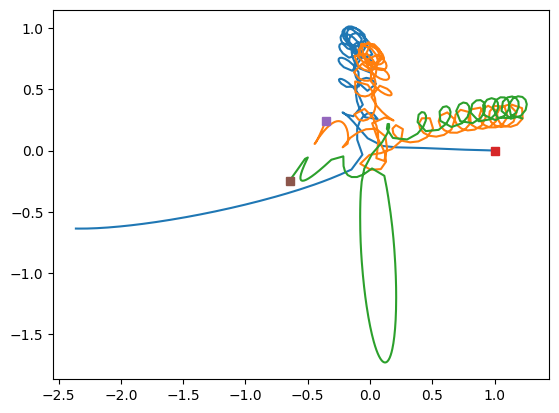

In [29]:
k = np.random.randint(idx.shape[0])
print(k)
pltidx = range(idx[k] , 257+idx[k])
pltsquare = idx[k]
plt.plot(trainSet.x_1[pltidx], trainSet.y_1[pltidx])
plt.plot(trainSet.x_2[pltidx], trainSet.y_2[pltidx])
plt.plot(trainSet.x_3[pltidx], trainSet.y_3[pltidx])

plt.plot(trainSet.x_1[pltsquare], trainSet.y_1[pltsquare], 's')
plt.plot(trainSet.x_2[pltsquare], trainSet.y_2[pltsquare], 's')
plt.plot(trainSet.x_3[pltsquare], trainSet.y_3[pltsquare], 's')

## Data Cleaning

In [30]:
#trajectory id column
trainSet['trajectory_id'] = trainSet['Id'] // 257
trainSet.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,trajectory_id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4,0


In [31]:
# Clean rows with 0's in any column
##cleanSet = trainSet.loc[(trainSet.drop(columns='trajectory_id') != 0).all(axis=1)]
cleanSet = trainSet.loc[~(trainSet.drop(columns=['Id','trajectory_id']) == 0).all(axis=1)]
cleanSet

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,trajectory_id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284995,9.843750,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,0.973131,0.384048,1.008133,1284995,4999
1284996,9.882810,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,1.011822,0.378533,0.973406,1284996,4999
1284997,9.921880,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,1.049218,0.373027,0.941717,1284997,4999
1284998,9.960940,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,1.085428,0.367788,0.912645,1284998,4999


## Training the Model

### Definiton of Features and Targets

- **X**: 
    ```['t', 'x_1(0)', 'y_1(0)', 'v_x_1(0)', 'v_y_1(0)', 'x_2(0)', 'y_2(0)', 'v_x_2(0)', 'v_y_2(0)', 'x_3(0)', 'y_3(0)', 'v_x_3(0)', 'v_y_3(0)']```
    - This is a raw feature table where all the rows are replicated to be the first position of each trajectory. It contains the speed columns as well.

- **Y**: 
    ```[x_1(t), y_1(t), v_x_1(t), v_y_1(t), x_2(t), y_2(t), v_x_2(t), v_y_2(t), x_3(t), y_3(t), v_x_3(t), v_y_3(t)]```
    - This is what we will train the model to predict.

The columns to exclude can be splitting the dataset.

In [32]:
# Features
# Group by 'trajectory_id' and get the first occurrence of each group
# This allows for better manipulation or analysis of data
first_occurrence = cleanSet.groupby('trajectory_id').first().reset_index()
# Merge first occurrence back to the original dataframe, only replacing columns that need to be kept constant
columns_to_replace = cleanSet.columns.difference(['t', 'trajectory_id', 'Id'])  # Columns to replace except 't' and 'trajectory_id'

# We merge 'first_occurrence' on 'trajectory_id' with the original dataframe,
# and only replace the required columns.
X_raw = cleanSet[['t', 'trajectory_id', 'Id']].merge(
    first_occurrence[['trajectory_id'] + list(columns_to_replace)],
    on='trajectory_id',
    how='left'
)
# Reorder the columns
X_raw = X_raw[['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2', 'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id', 'trajectory_id']]
X_raw

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,trajectory_id
0,0.000000,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0,0
1,0.039062,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,1,0
2,0.078125,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,2,0
3,0.117188,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,3,0
4,0.156250,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089785,9.843750,1.0,0.0,0.0,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284995,4999
1089786,9.882810,1.0,0.0,0.0,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284996,4999
1089787,9.921880,1.0,0.0,0.0,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284997,4999
1089788,9.960940,1.0,0.0,0.0,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284998,4999


In [33]:
# Target
Y_raw = cleanSet[['x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2', 'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id', 'trajectory_id']]
Y_raw

,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,trajectory_id
0,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0,0
1,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1,0
2,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2,0
3,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3,0
4,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284995,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,0.973131,0.384048,1.008133,1284995,4999
1284996,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,1.011822,0.378533,0.973406,1284996,4999
1284997,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,1.049218,0.373027,0.941717,1284997,4999
1284998,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,1.085428,0.367788,0.912645,1284998,4999


## Assessing Model Accuracy

In [34]:
def plot_y_yhat(y_test,y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_test) > MAX:
        idx = np.random.choice(len(y_test),MAX, replace=False)
    else:
        idx = np.arange(len(y_test))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_test[idx,i])
        x1 = np.max(y_test[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_test[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig(plot_title+'.pdf')
    plt.show()

### Data Splitting

In [35]:
# Split the data for training and testing
"""
Splits the dataset into training and testing sets based on unique trajectory IDs.
Parameters:
X (pd.DataFrame): The feature dataset containing a 'trajectory_id' column.
y (pd.DataFrame): The target dataset containing a 'trajectory_id' column.
test_size (float, optional): The proportion of the dataset to include in the test split. Default is 0.2.
columns_to_drop (list, optional): List of columns to drop from the feature dataset. Default is an empty list.
Returns:
tuple: A tuple containing four DataFrames:
    - X_train (pd.DataFrame): The training set of the feature dataset.
    - X_test (pd.DataFrame): The testing set of the feature dataset.
    - y_train (pd.DataFrame): The training set of the target dataset.
    - y_test (pd.DataFrame): The testing set of the target dataset.
"""

def custom_train_test_split(X, y, test_size=0.2, columns_to_drop=[]):
    # Get unique trajectory_ids
    unique_ids = X['trajectory_id'].unique()
    
    # Split the trajectory_ids into train and test sets
    train_ids, test_ids = train_test_split(unique_ids, test_size=test_size, random_state=42)
    
    # Split the data based on the trajectory_ids
    X_train = X[X['trajectory_id'].isin(train_ids)]
    X_test = X[X['trajectory_id'].isin(test_ids)]
    y_train = y[y['trajectory_id'].isin(train_ids)]
    y_test = y[y['trajectory_id'].isin(test_ids)]
    
    # Drop columns to get only data
    X_columns_drop = ['trajectory_id','t', 'Id'] + columns_to_drop
    Y_columns_drop = ['trajectory_id', 'Id'] + columns_to_drop

    # Drop the specified columns from X and y
    X_train = X_train.drop(columns=X_columns_drop)
    X_test = X_test.drop(columns=X_columns_drop)
    y_train = y_train.drop(columns=Y_columns_drop)
    y_test = y_test.drop(columns=Y_columns_drop)
    
    return X_train, X_test, y_train, y_test


# Model Evaluation

## Data Splitting

Model score:  0.02594462984044048


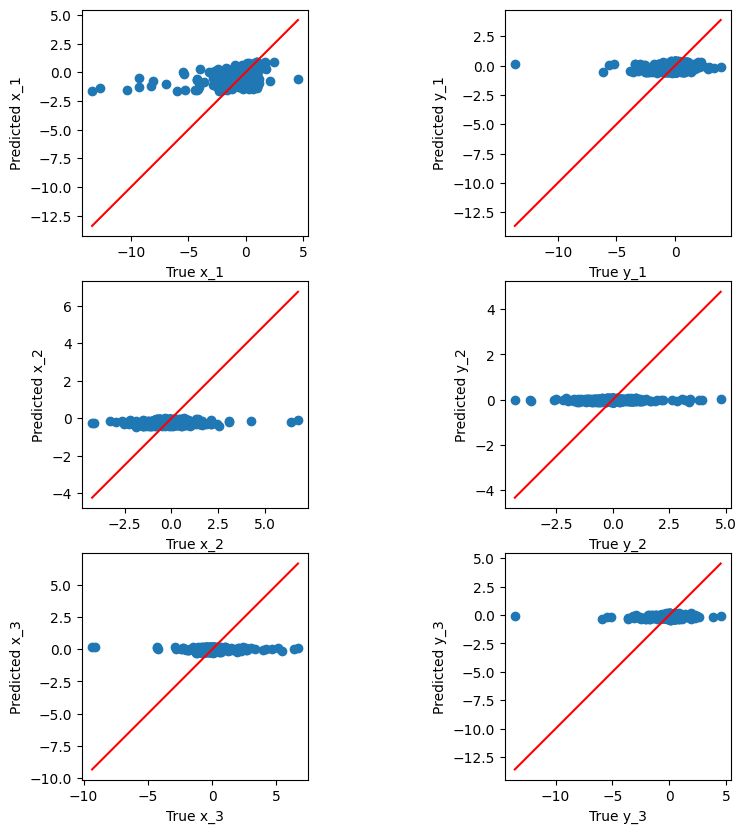

In [36]:
# Split the data
X_train, X_test, y_train, y_test = custom_train_test_split(X_raw, Y_raw, test_size=0.2)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model score: ", model.score(X_test, y_test))

# Predict on the test set
y_pred = model.predict(X_test)

plot_y_yhat(y_test.values, y_pred, plot_title="LinearRegression_Predictions")

## Mean Square Error

In [37]:
def evaluate_generalization(X, y):
    
    # Split the data into training and testing sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error for both sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    plt.scatter(X_train, y_train, color='blue', label='Training data')
    plt.scatter(X_test, y_test, color='green', label='Testing data')
    plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Predicted line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()

    return train_mse, test_mse

c:\Users\35196\Desktop\Temp Semestre\AA\Project\AA_three-body_problem\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


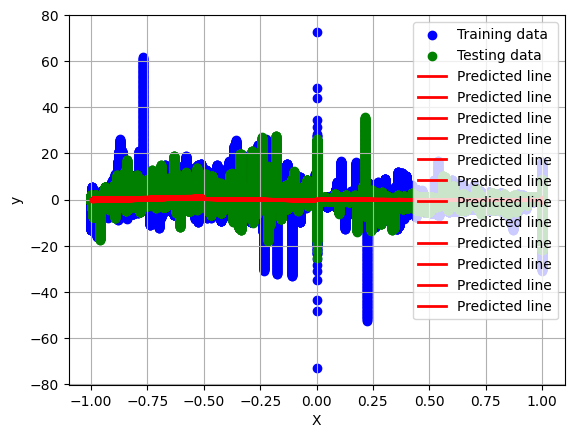

In [38]:
train_mse, test_mse = evaluate_generalization(X_raw, Y_raw)

## Polymonial

In [44]:
# Function to plot the model
def plot_model(X, y, model, degree, title):
     # Create a smooth curve for the plot (use linspace for smoother curve)
    X_plot = np.linspace(min(X), max(X), 100).reshape(-1, 1)
    
    # If degree > 1, apply polynomial transformation
    if degree > 1:
        poly = PolynomialFeatures(degree)
        X_plot_poly = poly.fit_transform(X_plot)
    else:
        X_plot_poly = X_plot
    
    # Predict using the model
    y_plot = model.predict(X_plot_poly)
    
    # Plot the original data
    plt.scatter(X, y, color='blue', label='Original data')
    
    # Plot the model prediction
    plt.plot(X_plot, y_plot, color='red', label=f'{degree}-degree model')
    
    # Add title, labels, and legend
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

In [50]:
def evaluate_generalization_poly(X, y):
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2)
    
    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on both training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error for both sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # plt.scatter(X_train, y_train, color='blue', label='Training data')
    # plt.scatter(X_test, y_test, color='green', label='Testing data')
    # plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Predicted line')
    # plt.xlabel('X')
    # plt.ylabel('y')
    # plt.legend()
    # plt.grid()
    # plt.show()

    return train_mse, test_mse

In [57]:
X_raw = X_raw.apply(pd.to_numeric, errors='coerce')  # For DataFrames
# Ensure Y_raw is 1D before converting to numeric
if isinstance(Y_raw, pd.DataFrame):
    Y_raw = Y_raw.squeeze()  # Converts a single-column DataFrame into a Series

# If Y_raw is already a NumPy array, ensure it's reshaped properly to 1D
Y_raw = np.array(Y_raw).reshape(-1)  # Convert to 1D if it's not
# Now convert Y_raw to numeric values
Y_raw = pd.to_numeric(Y_raw, errors='coerce')

# Handling missing values (NaNs) by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_raw = imputer.fit_transform(X_raw)
Y_raw = np.array(Y_raw).reshape(-1, 1)  # Ensure Y_raw is in the correct shape if it's a single column

# Now proceed with polynomial features and model fitting
degrees = [1, 3, 10]  # Degrees of polynomial to fit

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_raw)  # Transform X into polynomial features

    # Fit the model with the transformed data
    model = LinearRegression()
    model.fit(X_poly, Y_raw)  # Fit the model with the polynomial features
    
    # Evaluate the generalization of the model using your custom evaluation function
    train_mse, test_mse = evaluate_generalization_poly(X_raw, Y_raw)

    # Plot the model with the original data and predictions
    plot_model(X_raw, Y_raw, model, degree, title=f"Model Fit for Degree {degree}")

    # Print the results
    print(f"Degree {degree}: Train MSE = {train_mse:.2f}, Test MSE = {test_mse:.2f}")


ValueError: Found input variables with inconsistent numbers of samples: [1089790, 15257060]

In [39]:
realSet = pd.read_csv("../data/mlNOVA/mlNOVA/X_test.csv")
realSet

,Id,t,x0_1,y0_1,x0_2,y0_2,x0_3,y0_3
0,0,0.000000,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
1,1,0.039062,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
2,2,0.078125,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
3,3,0.117188,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
4,4,0.156250,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
...,...,...,...,...,...,...,...,...
1041616,1041616,9.843750,1.0,0.0,-0.207166,0.852911,-0.792834,-0.852911
1041617,1041617,9.882810,1.0,0.0,-0.207166,0.852911,-0.792834,-0.852911
1041618,1041618,9.921880,1.0,0.0,-0.207166,0.852911,-0.792834,-0.852911
1041619,1041619,9.960940,1.0,0.0,-0.207166,0.852911,-0.792834,-0.852911


In [40]:
# Preprocess df_real to match the format expected by the model
X_real = realSet[['x0_1', 'y0_1', 'x0_2', 'y0_2', 'x0_3', 'y0_3']]

# Scale the features
scaler = StandardScaler()
X_real_scaled = scaler.fit_transform(X_real)

# Make predictions using the trained model
y_real_pred = model.predict(X_real_scaled)

# Create an Id table
Id_table = realSet[['Id']]

# Convert y_real_pred to a DataFrame and drop the speed columns
y_real_pred_df = pd.DataFrame(y_real_pred, columns=['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3'])

# Concatenate Id_table with y_real_pred_df
result = pd.concat([Id_table, y_real_pred_df], axis=1)

print(result.shape)

# Save to CSV
result.to_csv("baseline-model.csv", index=False)

plot_y_yhat(y_test.values, y_real_pred, plot_title="RealData_Predictions")

ValueError: X has 6 features, but LinearRegression is expecting 12 features as input.